<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW5_boosting_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашняя работа: прогнозирование заработной платы и кластеризация типов движений**

### **Постановка задачи:**

В этой работе две части:

*   В первой части вам предстоит построить алгоритм на основе бустинга для прогнозирования зарплаты
*   Во второй части вам предстоит кластеризовать типы движений по имеющимся данным с акселерометров и гироскопов

### **Оценивание:**

- Как всегда оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.
- Брать код из открытых источников позволительно. Следование культуре цитирования **обязательно.**

### **Баллы:**

Суммарно за задание можно получить 10 основных и 1 бонусный балл.

Оценка за ДЗ = min{ваш балл, 10}

**Мягкий дедлайн: 16 февраля 23:59**

**Интересной вам работы!**


# **Часть 1. Прогнозирование заработной платы при помощи бустинга**

**Количество баллов:** 7

## **Постановка задачи:**

Данные выгружены и лежат в файле `ds_salary.csv`. Вам доступны описания признаков и значения целевой переменной.

**Ваша задача:** построение модели бустинга и оценка данной модели.

## **Описание даных**

- work_year: год, в который взяты данные;
- experience_level: уровень опыта, кодируемый как SE, MI EN или EX
- employment_type: тип занятости (FT, PT, CT, FL)
- job_title: название рабочей позиции в компании;
- salary: зараплата на позиции;
- salary_currency: валюта в которой начисляют зарплату;
- employee_residence: страна или регион проживания сотрудника
- remote_ratio: процент удаленки, предлагаемый в компании (0, 50, 100)
- company_location: местоположение компании
- company_size: размер компании, оцененный как S, M, L
- salary_in_usd: целевая переменная


Как всегда, загрузим набор данных.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://github.com/hse-ds/iad-intro-ds/raw/refs/heads/master/2023/homeworks/hw-08-boosting/ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## **Задание 1 (0.3 балла)**

Вам даны описания переменных. Проверьте, что категориальные признаки, категории которых перечислены, не имеют ошибочных значений. Для этого:

- Напишите цикл, пробегающий по выбранным признакам и оценивающий, что в них нет лишних значений;

In [3]:
cols_values = {"experience_level": ["SE", "MI", "EN", "EX"],
               "employment_type": ["FT", "PT", "CT", "FL"],
               "remote_ratio": [0,50,100],
               "company_size": ["S", "M", "L"]}

for col in cols_values:
    print(f"Признак {col}: уникальные значения = {list(df[col].unique())}")
    if set(df[col].unique()) != set(cols_values[col]):
        print(col, set(df[col].unique()), set(cols_values[col]))

Признак experience_level: уникальные значения = ['SE', 'MI', 'EN', 'EX']
Признак employment_type: уникальные значения = ['FT', 'CT', 'FL', 'PT']
Признак remote_ratio: уникальные значения = [100, 0, 50]
Признак company_size: уникальные значения = ['L', 'S', 'M']


## **Задание 2 (0.3 балла)**

Проведите базовые шаги оценки качества данных.
- Есть есть проблемы, устраните их;
- Если нет проблем, кратко опишите это.

In [4]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio        

In [5]:
for col in df.columns:
    print(col, list(df[col].unique()))

work_year [2023, 2022, 2020, 2021]
experience_level ['SE', 'MI', 'EN', 'EX']
employment_type ['FT', 'CT', 'FL', 'PT']
job_title ['Principal Data Scientist', 'ML Engineer', 'Data Scientist', 'Applied Scientist', 'Data Analyst', 'Data Modeler', 'Research Engineer', 'Analytics Engineer', 'Business Intelligence Engineer', 'Machine Learning Engineer', 'Data Strategist', 'Data Engineer', 'Computer Vision Engineer', 'Data Quality Analyst', 'Compliance Data Analyst', 'Data Architect', 'Applied Machine Learning Engineer', 'AI Developer', 'Research Scientist', 'Data Analytics Manager', 'Business Data Analyst', 'Applied Data Scientist', 'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer', 'Head of Data', 'Data Science Manager', 'Data Manager', 'Machine Learning Researcher', 'Big Data Engineer', 'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer', 'Director of Data Science', 'Machine Learning Scientist', 'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician', 'Applied Ma

In [8]:
print("Количество дубликатов:", df.duplicated().sum())

Количество дубликатов: 1171


In [12]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [13]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


Пропусков и странных значений нет, но есть дубликаты. Удалим их

In [14]:
df = df.drop_duplicates()
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [15]:
print("Количество дубликатов:", df.duplicated().sum())

Количество дубликатов: 0


## **Задание 3 (0.3 балла)**

Вернитесь к описанию признаков.
- Проверьте, все ли признаки соответствуют постановке задачи? Если есть лишние признаки, удалите их и обоснуйте удаление, если нет, сделайте вывод о релевантности (достаточно в одну-две строки)
- Зафиксируйте, в каких признаках много категорий.

Проверьте, все ли признаки соответствуют постановке задачи? - **Да**

Колонки с большим количеством категорий:
* job_title
* employee_residence
* company_location

**Ваши выводы здесь**

salary, salary_currency и salary_in_usd имеют схожее значение. Удалим salary и salary_currency

In [16]:
df = df.drop(['salary', 'salary_currency'], axis=1)

## **Задание 4 (0.2 балла)**

Разделите выборку на train, test (80%, 20%).

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Задание 5 (0.3 балла)**

Будем проверять два сценария. Первый — построение модели только на непрерывных признаках, а второй — построение с категориальными. В этом задании подготовьте всё, чтобы проверить валидность обоих сценариев. А именно:

- Выделите данные для тренировки и теста для непрерывных признаков
- Выделите данные для тренировки и теста для непрерывных + категориальных признаков, пока ничего не кодируйте.

In [19]:
numeric_features = ['work_year', 'remote_ratio']
categorical_features = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

# Сценарий 1
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]

# Сценарий 2
X_train_full = X_train[numeric_features + categorical_features]
X_test_full = X_test[numeric_features + categorical_features]

## **Задание 6 (0.2 балла)**

- Обучите модель линейной регресии на числовых признаках и оцените её качество через mape и rmse;
- Сделайте вывод о качестве построенной модели;

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse

lr = LinearRegression()
lr.fit(X_train_numeric, y_train)
y_pred_lr = lr.predict(X_test_numeric)

mape_lr = mape(y_test, y_pred_lr)
rmse_lr = mse(y_test, y_pred_lr)**0.5
print("MAPE =", mape_lr)
print("RMSE =", rmse_lr)

MAPE = 0.829056639955772
RMSE = 64000.532625649634


## **Задание 8 (0.2 балла)**

- Обучите модель бустинга (любую из трех библиотек catboost, xgboost, lightgbm) с гиперпараметрами по умолчанию на непрерывных признаках и оцените её качество через mape и rmse;
- Сделайте вывод о качестве построенной модели;

In [21]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train_numeric, y_train)
y_pred_lgb = lgb_model.predict(X_test_numeric)

mape_lgb = mape(y_test, y_pred_lgb)
rmse_lgb = mse(y_test, y_pred_lgb)**0.5
print("MAPE =", mape_lgb)
print("RMSE =", rmse_lgb)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 2
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

## **Задание 9 (0.8 балла)**

Теперь подключим категориальные признаки. Но попроубем разные стратегии предобработки.

**1:**
- Предобработайте категориальные признаки при помощи OHE
- Постройте модель бустинга и линейную регрессию
- Оцените качество обеих моделей

**2:**
- Предобработайте категориальные признаки при помощи LabelEncoding
- Постройте модель бустинга и линейную регрессию
- Оцените качество обеих моделей

**3:**
- Предобработайте категориальные признаки при помощи MeanTargetEnc
- Постройте модель бустинга и линейную регрессию
- Оцените качество обеих моделей

Сделайте выводы по построениям 1-3. Выберите лучшую модель и дальше поработайте с ней.

**1**

In [24]:
X_train_dummies = pd.get_dummies(X_train_full, columns=categorical_features, drop_first=False)
X_test_dummies = pd.get_dummies(X_test_full, columns=categorical_features, drop_first=False)

X_test_dummies = X_test_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

lr_dummies = LinearRegression()
lr_dummies.fit(X_train_dummies, y_train)
y_pred_lr_dummies = lr_dummies.predict(X_test_dummies)
mape_lr_dummies = mape(y_test, y_pred_lr_dummies)
rmse_lr_dummies = mse(y_test, y_pred_lr_dummies)**0.5

lgb_dummies = lgb.LGBMRegressor(random_state=42)
lgb_dummies.fit(X_train_dummies, y_train)
y_pred_lgb_dummies = lgb_dummies.predict(X_test_dummies)
mape_lgb_dummies = mape(y_test, y_pred_lgb_dummies)
rmse_lgb_dummies = mse(y_test, y_pred_lgb_dummies)**0.5

print("OHE и линейная регрессия: MAPE =", mape_lr_dummies, "RMSE =", rmse_lr_dummies)
print("OHE и LightGBM: MAPE =", mape_lgb_dummies, "RMSE =", rmse_lgb_dummies)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 78
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 37
[LightGBM] [Info] Start training from score 133570.320271
OHE и линейная регрессия: MAPE = 0.4581551387029792 RMSE = 53230.96292536475
OHE и LightGBM: MAPE = 0.46159205433061656 RMSE = 53300.81952136197


**2**

In [26]:
from sklearn.preprocessing import OrdinalEncoder

X_train_label = X_train_full.copy()
X_test_label = X_test_full.copy()

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_label[categorical_features] = ordinal_encoder.fit_transform(X_train_label[categorical_features])
X_test_label[categorical_features] = ordinal_encoder.transform(X_test_label[categorical_features])

lr_label = LinearRegression()
lr_label.fit(X_train_label, y_train)
y_pred_lr_label = lr_label.predict(X_test_label)
mape_lr_label = mape(y_test, y_pred_lr_label)
rmse_lr_label = mse(y_test, y_pred_lr_label)**0.5

lgb_label = lgb.LGBMRegressor(random_state=42)
lgb_label.fit(X_train_label, y_train)
y_pred_lgb_label = lgb_label.predict(X_test_label)
mape_lgb_label = mape(y_test, y_pred_lgb_label)
rmse_lgb_label = mse(y_test, y_pred_lgb_label)**0.5

print("Label encoding и линейная регрессия: MAPE =", mape_lr_label, "RMSE =", rmse_lr_label)
print("Label encoding и LightGBM: MAPE =", mape_lgb_label, "RMSE =", rmse_lgb_label)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 7
[LightGBM] [Info] Start training from score 133570.320271
Label encoding и линейная регрессия: MAPE = 0.5717883928379213 RMSE = 55931.65680002584
Label encoding и LightGBM: MAPE = 0.49510114607111033 RMSE = 53073.412316752256


**3**

In [36]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


Возникли проблемы с target_encoder, поэтому решил взять category_encoders

In [39]:
import category_encoders as ce

mean_encoder = ce.TargetEncoder(cols=categorical_features)

X_train_mte = X_train_full.copy()
X_test_mte = X_test_full.copy()

X_train_mte[categorical_features] = mean_encoder.fit_transform(X_train_mte[categorical_features], y_train)
X_test_mte[categorical_features] = mean_encoder.transform(X_test_mte[categorical_features])

lr_mte = LinearRegression()
lr_mte.fit(X_train_mte, y_train)
y_pred_lr_mte = lr_mte.predict(X_test_mte)
mape_lr_mte = mape(y_test, y_pred_lr_mte)
rmse_lr_mte = mse(y_test, y_pred_lr_mte)**0.5

lgb_mte = lgb.LGBMRegressor(random_state=42)
lgb_mte.fit(X_train_mte, y_train)
y_pred_lgb_mte = lgb_mte.predict(X_test_mte)
mape_lgb_mte = mape(y_test, y_pred_lgb_mte)
rmse_lgb_mte = mse(y_test, y_pred_lgb_mte)**0.5

print("Mean target encoding и линейная регрессия: MAPE =", mape_lr_mte, "RMSE =", rmse_lr_mte)
print("Mean target encoding и LightGBM: MAPE =", mape_lgb_mte, "RMSE =", rmse_lgb_mte)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 8
[LightGBM] [Info] Start training from score 133570.320271
Mean target encoding и линейная регрессия: MAPE = 0.46752379269881617 RMSE = 52528.78783557254
Mean target encoding и LightGBM: MAPE = 0.45574107197323444 RMSE = 52098.75133624596


Выводы:

* OHE и линейная регрессия: MAPE = 0.4581551387029792 RMSE = 53230.96292536475
* OHE и LightGBM: MAPE = 0.46159205433061656 RMSE = 53300.81952136197
* Label encoding и линейная регрессия: MAPE = 0.5717883928379213 RMSE = 55931.65680002584
* Label encoding и LightGBM: MAPE = 0.49510114607111033 RMSE = 53073.412316752256
* Mean target encoding и линейная регрессия: MAPE = 0.46752379269881617 RMSE = 52528.78783557254
* Mean target encoding и LightGBM: MAPE = 0.45574107197323444 RMSE = 52098.75133624596

Минимальный MAPE и RMSE у связки Mean target encoding и LightGBM



## **Задание 10 (0.5 балла)**

Покажите, где ошибается ваша модель. Выведите топ 20 примеров с наибольшей ошибкой. Проанализируйте их. Какие выводы можно сделать? Что стоит изменить в данных чтобы улучшить качество модели?

In [43]:
import numpy as np

errors = np.abs(y_test - y_pred_lgb_mte)
error_df = X_test_full.copy()
error_df['y_true'] = y_test.values
error_df['y_pred'] = y_pred_lgb_mte
error_df['error'] = errors

top_20_errors = error_df.sort_values(by='error', ascending=False).head(20)
top_20_errors

,work_year,remote_ratio,experience_level,employment_type,job_title,employee_residence,company_location,company_size,y_true,y_pred,error
2011,2022,0,MI,FT,Data Analyst,GB,GB,M,430967,56480.147557,374486.852443
1288,2023,0,SE,FT,Data Analyst,US,US,M,385000,130625.551577,254374.448423
1695,2023,0,SE,FT,Applied Scientist,US,US,L,72000,239532.395101,167532.395101
2406,2022,100,SE,FT,Data Engineer,US,US,M,315000,162483.332872,152516.667128
3155,2022,100,MI,FT,AI Scientist,IN,US,L,200000,54776.668070,145223.331930
3485,2021,100,MI,FT,Applied Machine Learning Scientist,VN,US,M,38400,176381.282667,137981.282667
1847,2022,0,MI,FT,Data Engineer,US,US,M,260000,127657.405551,132342.594449
2022,2022,50,SE,FT,3D Computer Vision Researcher,CA,AL,S,10000,139231.050576,129231.050576
801,2023,100,SE,FT,Data Analyst,US,US,M,250000,120974.352628,129025.647372
3519,2021,50,EX,FT,Head of Data,RU,RU,L,230000,101877.944028,128122.055972


In [51]:
df['job_title'].value_counts()

,count
job_title,
Data Engineer,598
Data Scientist,538
Data Analyst,396
Machine Learning Engineer,206
Analytics Engineer,91
...,...
Compliance Data Analyst,1
Deep Learning Researcher,1
Staff Data Analyst,1


In [48]:
professions = ['Data Analyst', 'Applied Scientist', 'Data Engineer', 'AI Scientist', 'Applied Machine Learning Scientist', '3D Computer Vision Researcher']
for prof in professions:
    print(prof, df['job_title'].value_counts()[prof])

Data Analyst 396
Applied Scientist 31
Data Engineer 598
AI Scientist 16
Applied Machine Learning Scientist 12
3D Computer Vision Researcher 4


Думаю, можно было бы удалить выбросы в зарплатах

## **Задание 11 (0.5 балла)**

Придумайте признаки для улучшения качества модели на основе предыдущего пункта. Как вам кажется какими признаками можно улучшить качетсво модели? Реализуйте признаки и проверьте улучшилось ли качество модели.

**Примечание:**
Полный балл за задание ставится даже при отсутствии улучшения качества модели, важно попробовать проверить свои гипотезы и сделать выводы.

In [54]:
import category_encoders as ce

mean_encoder = ce.TargetEncoder(cols=categorical_features)

X_train_mte = X_train_full.copy()
X_test_mte = X_test_full.copy()



In [55]:
X_train_mte

,work_year,remote_ratio,experience_level,employment_type,job_title,employee_residence,company_location,company_size
25,2023,0,SE,FT,Business Intelligence Engineer,US,US,M
2647,2022,0,MI,FT,Data Manager,US,US,M
2624,2022,0,SE,FT,Data Analyst,US,US,M
2565,2022,100,SE,FT,Data Analyst,US,US,M
2390,2022,0,MI,FT,Data Engineer,US,US,M
...,...,...,...,...,...,...,...,...
2477,2022,100,SE,FT,Data Engineer,US,US,M
1656,2023,0,MI,FT,Data Analyst,US,US,M
1711,2023,0,MI,FT,Machine Learning Engineer,GB,GB,M
1936,2022,0,SE,FT,Machine Learning Engineer,US,US,M


In [56]:
# Числовой уровень опыта
X_train_mte['experience_numeric'] = X_train_mte['experience_level'].map({'SE': 1, 'MI': 2, 'EN': 3, 'EX': 4})
X_test_mte['experience_numeric'] = X_test_mte['experience_level'].map({'SE': 1, 'MI': 2, 'EN': 3, 'EX': 4})

# Проживает ли сотрудник в стране компании
X_train_mte['same_country'] = (X_train_mte['employee_residence'] == X_train_mte['company_location']).astype(int)
X_test_mte['same_country'] = (X_test_mte['employee_residence'] == X_test_mte['company_location']).astype(int)

In [58]:
X_train_mte[categorical_features] = mean_encoder.fit_transform(X_train_mte[categorical_features], y_train)
X_test_mte[categorical_features] = mean_encoder.transform(X_test_mte[categorical_features])


lgb_mte = lgb.LGBMRegressor(random_state=42)
lgb_mte.fit(X_train_mte, y_train)
y_pred_lgb_mte = lgb_mte.predict(X_test_mte)
mape_lgb_mte = mape(y_test, y_pred_lgb_mte)
rmse_lgb_mte = mse(y_test, y_pred_lgb_mte)**0.5

print("Mean target encoding и LightGBM: MAPE =", mape_lgb_mte, "RMSE =", rmse_lgb_mte)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
Mean target encoding и LightGBM: MAPE = 0.46036241355102925 RMSE = 52079.21353437083


Было:
* Mean target encoding и LightGBM: MAPE = 0.45574107197323444 RMSE = 52098.75133624596

Стало:
* Mean target encoding и LightGBM: MAPE = 0.46036241355102925 RMSE = 52079.21353437083

Результаты не однозначный, поскольку RMSE чуть упала, но MAPE увеличилась

## **Задание 12 (1 балл)**

Поупражняемся с разными бустингами!

- Используйте catboost.
- Обучите модель — на полном наборе данных с категориальными признаками.
- Подберите оптимальные гиперпараметры.
- Оцените качество итоговой модели, скорость обучения и скорость предсказания.


**Примечание:**
Замерять скорость = смотреть, как долго исполняется код.

In [59]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [62]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.4 MB/s eta 0:00:00


In [65]:
import optuna
import time

cat_features_indices = [X_train_full.columns.get_loc(col) for col in categorical_features]

def objective_cb(trial):
    param = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "depth": trial.suggest_int("depth", 4, 10),
        "random_seed": 42,
        "verbose": 0,
        "cat_features": cat_features_indices
    }
    from catboost import CatBoostRegressor
    model = CatBoostRegressor(**param)
    model.fit(X_train_full, y_train)
    preds = model.predict(X_test_full)
    rmse = mse(y_test, preds)**0.5
    return rmse
time0 = time.time()
study_cb = optuna.create_study(direction="minimize")
study_cb.optimize(objective_cb, n_trials=50)
print(f"Времени затрачено: {time.time() - time0} секунд")
print("Лучшие гиперпараметры:", study_cb.best_params)
print("Лучшее RMSE:", study_cb.best_value)

[I 2025-02-15 13:55:22,939] A new study created in memory with name: no-name-c2785e22-ef8c-4e73-a508-a5175c22622f
[I 2025-02-15 13:55:23,754] Trial 0 finished with value: 53570.28293527581 and parameters: {'iterations': 130, 'learning_rate': 0.2629790453472255, 'depth': 10}. Best is trial 0 with value: 53570.28293527581.
[I 2025-02-15 13:55:24,846] Trial 1 finished with value: 51342.80714351174 and parameters: {'iterations': 382, 'learning_rate': 0.027025314898960554, 'depth': 5}. Best is trial 1 with value: 51342.80714351174.
[I 2025-02-15 13:55:25,441] Trial 2 finished with value: 53961.852918818826 and parameters: {'iterations': 178, 'learning_rate': 0.22609455430543757, 'depth': 8}. Best is trial 1 with value: 51342.80714351174.
[I 2025-02-15 13:55:35,706] Trial 3 finished with value: 56026.79970165776 and parameters: {'iterations': 931, 'learning_rate': 0.27668369467336257, 'depth': 8}. Best is trial 1 with value: 51342.80714351174.
[I 2025-02-15 13:55:41,605] Trial 4 finished wit

Времени затрачено: 139.22915816307068 секунд
Лучшие гиперпараметры: {'iterations': 624, 'learning_rate': 0.01255504125701124, 'depth': 4}
Лучшее RMSE: 51110.72168045014


## **Задание 13 (1 балл)**

- Используйте xgboost.
- Обучите модель — на полном наборе данных с категориальными признаками. Стратегию кодирования оставьте ту, что показала себя лучшей в пункте 9.
- Подберите оптимальные гиперпараметры.
- Оцените качество итоговой модели, скорость обучения и скорость предсказания.



In [66]:
def objective_xgb(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "random_state": 42
    }
    import xgboost as xgb
    model = xgb.XGBRegressor(**param)
    model.fit(X_train_mte, y_train)
    preds = model.predict(X_test_mte)
    rmse = mse(y_test, preds)**0.5
    return rmse

time0 = time.time()
study_xgb = optuna.create_study(direction="minimize")
study_xgb.optimize(objective_xgb, n_trials=50)
print(f"Времени затрачено: {time.time() - time0} секунд")
print("Лучшие гиперпараметры:", study_xgb.best_params)
print("Лучшее RMSE:", study_xgb.best_value)

[I 2025-02-15 13:57:42,183] A new study created in memory with name: no-name-afe9daab-5941-4330-b16d-d949ba8de34a
[I 2025-02-15 13:57:42,740] Trial 0 finished with value: 57719.18557983991 and parameters: {'n_estimators': 747, 'learning_rate': 0.14365782118438927, 'max_depth': 6}. Best is trial 0 with value: 57719.18557983991.
[I 2025-02-15 13:57:43,005] Trial 1 finished with value: 56095.63719220952 and parameters: {'n_estimators': 680, 'learning_rate': 0.24326730006766656, 'max_depth': 3}. Best is trial 1 with value: 56095.63719220952.
[I 2025-02-15 13:57:43,552] Trial 2 finished with value: 57466.630038658084 and parameters: {'n_estimators': 737, 'learning_rate': 0.14488074900102121, 'max_depth': 6}. Best is trial 1 with value: 56095.63719220952.
[I 2025-02-15 13:57:43,936] Trial 3 finished with value: 56917.98000632138 and parameters: {'n_estimators': 688, 'learning_rate': 0.0741756809958929, 'max_depth': 5}. Best is trial 1 with value: 56095.63719220952.
[I 2025-02-15 13:57:45,109

Времени затрачено: 15.399879932403564 секунд
Лучшие гиперпараметры: {'n_estimators': 361, 'learning_rate': 0.011751787701754786, 'max_depth': 3}
Лучшее RMSE: 50841.37653525915


## **Задание 14 (1 балл)**

- Используйте lgbm.
- Обучите модель — на полном наборе данных с категориальными признаками. Стратегию кодирования оставьте ту, что показала себя лучшей в пункте 9.
- Подберите оптимальные гиперпараметры.
- Оцените качество итоговой модели, скорость обучения и скорость предсказания.


In [67]:
def objective_lgb(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "random_state": 42
    }
    import lightgbm as lgb
    model = lgb.LGBMRegressor(**param)
    model.fit(X_train_mte, y_train)
    preds = model.predict(X_test_mte)
    rmse = mse(y_test, preds)**0.5
    return rmse

time0 = time.time()
study_lgb = optuna.create_study(direction="minimize")
study_lgb.optimize(objective_lgb, n_trials=50)
print(f"Времени затрачено: {time.time() - time0} секунд")
print("Лучшие гиперпараметры:", study_lgb.best_params)
print("Лучшее RMSE:", study_lgb.best_value)

[I 2025-02-15 13:57:57,603] A new study created in memory with name: no-name-fe117a7e-d1f8-42ac-b7ad-f9ff450b0425


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:57:57,903] Trial 0 finished with value: 52054.37263108688 and parameters: {'n_estimators': 331, 'learning_rate': 0.05945304057712442, 'max_depth': 6}. Best is trial 0 with value: 52054.37263108688.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:57:58,520] Trial 1 finished with value: 56091.18261930378 and parameters: {'n_estimators': 790, 'learning_rate': 0.25945431185517387, 'max_depth': 9}. Best is trial 0 with value: 52054.37263108688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:57:58,926] Trial 2 finished with value: 53401.198257603806 and parameters: {'n_estimators': 533, 'learning_rate': 0.07854197082827565, 'max_depth': 10}. Best is trial 0 with value: 52054.37263108688.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:57:59,196] Trial 3 finished with value: 53174.39837373502 and parameters: {'n_estimators': 317, 'learning_rate': 0.24802819240572888, 'max_depth': 4}. Best is trial 0 with value: 52054.37263108688.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:58:00,081] Trial 4 finished with value: 53384.09717902399 and parameters: {'n_estimators': 911, 'learning_rate': 0.06541642955949685, 'max_depth': 6}. Best is trial 0 with value: 52054.37263108688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:00,712] Trial 5 finished with value: 56773.87418185919 and parameters: {'n_estimators': 841, 'learning_rate': 0.26153270449641425, 'max_depth': 9}. Best is trial 0 with value: 52054.37263108688.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, nu

[I 2025-02-15 13:58:01,185] Trial 6 finished with value: 53109.29563249458 and parameters: {'n_estimators': 566, 'learning_rate': 0.2488482756974878, 'max_depth': 3}. Best is trial 0 with value: 52054.37263108688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:01,497] Trial 7 finished with value: 52557.16879841397 and parameters: {'n_estimators': 360, 'learning_rate': 0.2563078107815998, 'max_depth': 3}. Best is trial 0 with value: 52054.37263108688.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:58:02,319] Trial 8 finished with value: 54270.6879133511 and parameters: {'n_estimators': 954, 'learning_rate': 0.19198605771910082, 'max_depth': 4}. Best is trial 0 with value: 52054.37263108688.
[I 2025-02-15 13:58:02,501] Trial 9 finished with value: 52232.22652334168 and parameters: {'n_estimators': 148, 'learning_rate': 0.1723703835414438, 'max_depth': 6}. Best is trial 0 with value: 52054.37263108688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:02,660] Trial 10 finished with value: 51979.03809542365 and parameters: {'n_estimators': 117, 'learning_rate': 0.011569393091006158, 'max_depth': 7}. Best is trial 10 with value: 51979.03809542365.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271


[I 2025-02-15 13:58:02,820] Trial 11 finished with value: 51876.30616482091 and parameters: {'n_estimators': 118, 'learning_rate': 0.01201827505691247, 'max_depth': 7}. Best is trial 11 with value: 51876.30616482091.
[I 2025-02-15 13:58:02,963] Trial 12 finished with value: 51418.358856665094 and parameters: {'n_estimators': 112, 'learning_rate': 0.021395198560132556, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271


[I 2025-02-15 13:58:03,192] Trial 13 finished with value: 51446.18275840198 and parameters: {'n_estimators': 216, 'learning_rate': 0.014098279839863014, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:03,528] Trial 14 finished with value: 52779.96238250425 and parameters: {'n_estimators': 239, 'learning_rate': 0.10769727936545703, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-02-15 13:58:04,050] Trial 15 finished with value: 54264.02646448268 and parameters: {'n_estimators': 487, 'learning_rate': 0.13212132838861923, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:58:04,214] Trial 16 finished with value: 51888.479331247814 and parameters: {'n_estimators': 226, 'learning_rate': 0.039767802339044964, 'max_depth': 10}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:04,858] Trial 17 finished with value: 54143.219429119505 and parameters: {'n_estimators': 702, 'learning_rate': 0.09973380456231615, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 secon

[I 2025-02-15 13:58:05,128] Trial 18 finished with value: 52066.2714762958 and parameters: {'n_estimators': 385, 'learning_rate': 0.03880078281807124, 'max_depth': 9}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:58:05,370] Trial 19 finished with value: 52845.52855757114 and parameters: {'n_estimators': 247, 'learning_rate': 0.13302363673865011, 'max_depth': 7}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:05,803] Trial 20 finished with value: 53960.431969609075 and parameters: {'n_estimators': 463, 'learning_rate': 0.20760346480937655, 'max_depth': 5}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:58:05,908] Trial 21 finished with value: 52316.648287974276 and parameters: {'n_estimators': 100, 'learning_rate': 0.0120298059902835, 'max_depth': 7}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2025-02-15 13:58:06,059] Trial 22 finished with value: 51720.63654988624 and parameters: {'n_estimators': 186, 'learning_rate': 0.039289776676666846, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.
[I 2025-02-15 13:58:06,211] Trial 23 finished with value: 51753.36356206785 and parameters: {'n_estimators': 189, 'learning_rate': 0.04486014993608202, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:06,433] Trial 24 finished with value: 52764.013035055315 and parameters: {'n_estimators': 280, 'learning_rate': 0.08696266038644423, 'max_depth': 9}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:58:06,795] Trial 25 finished with value: 55019.86336356283 and parameters: {'n_estimators': 394, 'learning_rate': 0.2984343710143714, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:06,938] Trial 26 finished with value: 51722.87859313781 and parameters: {'n_estimators': 182, 'learning_rate': 0.03338876212995823, 'max_depth': 10}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:07,460] Trial 27 finished with value: 53334.04055519528 and parameters: {'n_estimators': 666, 'learning_rate': 0.060955219312816306, 'max_depth': 9}. Best is trial 12 with value: 51418.358856665094.
[I 2025-02-15 13:58:07,635] Trial 28 finished with value: 52457.26825336058 and parameters: {'n_estimators': 176, 'learning_rate': 0.12148493681692209, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-02-15 13:58:07,941] Trial 29 finished with value: 51969.78982735237 and parameters: {'n_estimators': 300, 'learning_rate': 0.0713790573098582, 'max_depth': 5}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 13357

[I 2025-02-15 13:58:08,296] Trial 30 finished with value: 51929.74334827851 and parameters: {'n_estimators': 426, 'learning_rate': 0.028265837211161944, 'max_depth': 7}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:58:08,448] Trial 31 finished with value: 51896.096706646924 and parameters: {'n_estimators': 186, 'learning_rate': 0.047855391248168, 'max_depth': 10}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:08,617] Trial 32 finished with value: 51719.51047335043 and parameters: {'n_estimators': 213, 'learning_rate': 0.025132486629432266, 'max_depth': 10}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

[I 2025-02-15 13:58:08,828] Trial 33 finished with value: 51734.47324783283 and parameters: {'n_estimators': 269, 'learning_rate': 0.02626823331490475, 'max_depth': 9}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:09,072] Trial 34 finished with value: 52682.44285546117 and parameters: {'n_estimators': 316, 'learning_rate': 0.08194930207720104, 'max_depth': 9}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:58:09,239] Trial 35 finished with value: 52178.89674864004 and parameters: {'n_estimators': 214, 'learning_rate': 0.060188592371448385, 'max_depth': 10}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 13357

[I 2025-02-15 13:58:09,558] Trial 36 finished with value: 51995.95595391461 and parameters: {'n_estimators': 339, 'learning_rate': 0.05300301158333682, 'max_depth': 6}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:58:09,680] Trial 37 finished with value: 51501.153608835964 and parameters: {'n_estimators': 142, 'learning_rate': 0.02794259435240264, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:10,130] Trial 38 finished with value: 52140.67222618565 and parameters: {'n_estimators': 577, 'learning_rate': 0.022003185929120324, 'max_depth': 9}. Best is trial 12 with value: 51418.358856665094.
[I 2025-02-15 13:58:10,265] Trial 39 finished with value: 51841.54009213523 and parameters: {'n_estimators': 133, 'learning_rate': 0.07641348777432133, 'max_depth': 7}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:10,536] Trial 40 finished with value: 52970.34825873514 and parameters: {'n_estimators': 259, 'learning_rate': 0.15026592126241978, 'max_depth': 6}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:58:10,670] Trial 41 finished with value: 51545.67447758985 and parameters: {'n_estimators': 150, 'learning_rate': 0.026858411224649336, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.
[I 2025-02-15 13:58:10,794] Trial 42 finished with value: 51555.29577661497 and parameters: {'n_estimators': 141, 'learning_rate': 0.024490348778701005, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, nu

[I 2025-02-15 13:58:10,962] Trial 43 finished with value: 51948.42373054023 and parameters: {'n_estimators': 159, 'learning_rate': 0.05544092157075831, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:11,059] Trial 44 finished with value: 52526.601728734684 and parameters: {'n_estimators': 100, 'learning_rate': 0.011346339981190109, 'max_depth': 8}. Best is trial 12 with value: 51418.358856665094.
[I 2025-02-15 13:58:11,183] Trial 45 finished with value: 51462.093308454234 and parameters: {'n_estimators': 139, 'learning_rate': 0.023748550467523836, 'max_depth': 7}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-15 13:58:11,340] Trial 46 finished with value: 52012.50936867394 and parameters: {'n_estimators': 146, 'learning_rate': 0.09687136184975656, 'max_depth': 7}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-15 13:58:12,217] Trial 47 finished with value: 55854.29267396833 and parameters: {'n_estimators': 872, 'learning_rate': 0.2139315288951233, 'max_depth': 7}. Best is trial 12 with value: 51418.358856665094.
[I 2025-02-15 13:58:12,437] Trial 48 finished with value: 51733.063026560936 and parameters: {'n_estimators': 226, 'learning_rate': 0.04863267185082078, 'max_depth': 7}. Best is trial 12 with value: 51418.358856665094.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 10
[LightGBM] [Info] Start training from score 133570.320271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-02-15 13:58:13,378] Trial 49 finished with value: 53164.0845036418 and parameters: {'n_estimators': 989, 'learning_rate': 0.06563085512899947, 'max_depth': 5}. Best is trial 12 with value: 51418.358856665094.


Времени затрачено: 15.777742385864258 секунд
Лучшие гиперпараметры: {'n_estimators': 112, 'learning_rate': 0.021395198560132556, 'max_depth': 8}
Лучшее RMSE: 51418.358856665094


## **Задание 15 (0.4 балла)**

Сделайте выводы про модели и решение задачи.

- Какая из моделей показала лучший результат по качеству?
- Какая из моделей показала лучший результат по качеству, скорости обучения и скорости предсказания в совокупности?
- Насколько бустинги превзошли линейную модель? Целесообразно ли их использование?

CatBoost:
* Времени затрачено: 139.22915816307068 секунд
* Лучшие гиперпараметры: {'iterations': 624, 'learning_rate': 0.01255504125701124, 'depth': 4}
* Лучшее RMSE: 51110.72168045014

XGBoost:
* Времени затрачено: 15.399879932403564 секунд
* Лучшие гиперпараметры: {'n_estimators': 361, 'learning_rate': 0.011751787701754786, 'max_depth': 3}
* Лучшее RMSE: 50841.37653525915

LightGBM:
* Времени затрачено: 15.777742385864258 секунд
* Лучшие гиперпараметры: {'n_estimators': 112, 'learning_rate': 0.021395198560132556, 'max_depth': 8}
* Лучшее RMSE: 51418.358856665094

CatBoost работал очень долго и дал среднее качество

LightGBM сработал очень быстро, но дал качество на тесте чуть хуже, чем CatBoost

XGBoost в данном случае сработал лучше всего, посколько скорость выполнения наименьшая, а качество наилучшее

# **Часть 2: кластеризация типов движений**
**Количество баллов:** 3

В этой части будем работать с набором данных Samsung Human Activity Recognition. Набор данных заранее предобработан и снова доступен вам по [ссылке](https://drive.google.com/file/d/16ISu7lMumt5rbticbOggHMRjwTGBETtO/view?usp=sharing).

### **Постановка задачи**
Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S2. Вид активности человека с телефоном в кармане известен:
- 1 - ходьба,
- 2 - подъем вверх по лестнице,
- 3 - спуск по лестнице,
- 4 - сидение,
- 5 - стояние,
- 6 - лежание


Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

%matplotlib inline
%config InlineBackend.figure_format="retina"

RANDOM_STATE = 42

### **Задание 16 (0.1 балл)**
Прочитайте данные из файлов и объедните тестовую и обучающие выборки.

В файлах ```..._labels``` лежат настоящие классы. Их также объедините, но в отдельную переменную (например ```y```). Данный вектор для кластеризации нам не нужен, но мы будем смотреть по нему метрики.

In [75]:
import numpy as np

samsung_train = np.loadtxt("samsung_train.txt")
print(samsung_train)

[[ 0.28858451 -0.02029417 -0.13290514 ... -0.84124676  0.17994061
  -0.05862692]
 [ 0.27841883 -0.01641057 -0.12352019 ... -0.8447876   0.18028889
  -0.05431672]
 [ 0.27965306 -0.01946716 -0.11346169 ... -0.84893347  0.18063731
  -0.04911782]
 ...
 [ 0.27338737 -0.01701062 -0.04502183 ... -0.77913261  0.24914484
   0.04081119]
 [ 0.28965416 -0.01884304 -0.15828059 ... -0.78518142  0.24643223
   0.02533948]
 [ 0.35150347 -0.01242312 -0.20386717 ... -0.78326693  0.24680852
   0.03669484]]


In [77]:
samsung_test = np.loadtxt("samsung_test.txt")
print(samsung_test)

[[ 0.25717778 -0.02328523 -0.01465376 ... -0.72000927  0.27680104
  -0.0579783 ]
 [ 0.28602671 -0.01316336 -0.11908252 ... -0.69809082  0.28134292
  -0.08389801]
 [ 0.27548482 -0.02605042 -0.11815167 ... -0.70277146  0.28008303
  -0.0793462 ]
 ...
 [ 0.34996609  0.03007744 -0.11578796 ... -0.65535684  0.27447878
   0.18118355]
 [ 0.23759383  0.01846687 -0.09649893 ... -0.65971859  0.26478161
   0.18756291]
 [ 0.15362719 -0.01843651 -0.13701846 ... -0.66008023  0.26393619
   0.1881034 ]]


In [76]:
with open("samsung_train_labels.txt", "r", encoding='ascii') as f:
    samsung_train_labels = f.readlines()
    for i in range(len(samsung_train_labels)):
        samsung_train_labels[i] = int(samsung_train_labels[i].strip())
print(samsung_train_labels)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 

In [78]:
with open("samsung_test_labels.txt", "r", encoding='ascii') as f:
    samsung_test_labels = f.readlines()
    for i in range(len(samsung_test_labels)):
        samsung_test_labels[i] = int(samsung_test_labels[i].strip())
print(samsung_test_labels)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 

In [80]:
X = np.vstack((samsung_train, samsung_test))
y = samsung_train_labels + samsung_test_labels

In [81]:
# убедимся, что y содержит нужные нам классы
np.unique(y)

array([1, 2, 3, 4, 5, 6])

### **Задание 17 (0.2 балла)**

Так как мы будем пользоваться метрическими алгоритмами, отмасштабируйте выборку с помощью ```StandardScaler```.

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 2.10533854e-01, -6.87026385e-02, -4.52194533e-01, ...,
        -6.74432366e-01,  3.82007658e-01, -1.61505480e-02],
       [ 6.02084832e-02,  3.59023537e-02, -2.75221885e-01, ...,
        -6.81359801e-01,  3.83147865e-01, -1.20627169e-04],
       [ 7.84597052e-02, -4.64269585e-02, -8.55480582e-02, ...,
        -6.89470939e-01,  3.84288531e-01,  1.92144041e-02],
       ...,
       [ 1.11821625e+00,  1.28805864e+00, -1.29414692e-01, ...,
        -3.10750224e-01,  6.91509049e-01,  8.75719123e-01],
       [-5.43492722e-01,  9.75327452e-01,  2.34319837e-01, ...,
        -3.19283719e-01,  6.59762215e-01,  8.99444350e-01],
       [-1.78515253e+00, -1.86663622e-02, -5.29759691e-01, ...,
        -3.19991245e-01,  6.56994458e-01,  9.01454465e-01]])

### **Задание 18 (0.5 балла)**

Данных много и размерность большая. Чтобы ускорить рещение задачи с точки зрения построения модели, мы используем методы **понижения размерности**.

- Понизьте размерность с помощью `PCA`, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии отмасштабированных данных. Вам пригодится [документация](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Примечание:**
Для этого сумма значений массива pca.explained_variance_ratio_ должна быть не меньше 0.9.  ```random_state``` используйте из объявленной в самом начале переменной ```RANDOM_STATE``` (42).

In [85]:
from sklearn.decomposition import PCA

RANDOM_STATE = 42

pca = PCA(random_state=RANDOM_STATE)
pca.fit(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.9) + 1

pca = PCA(n_components=num_components, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-16.38097982,   1.99508307,   3.41569023, ...,  -0.34256962,
          0.24397444,  -1.94678658],
       [-15.58217328,   1.18259368,  -0.32120675, ...,  -0.13742091,
          0.16081322,  -0.61432028],
       [-15.42398918,   2.24316643,  -1.23778356, ...,   1.47098019,
          1.24311139,   0.24672176],
       ...,
       [ 11.84685312,  -3.43356502,   2.18801926, ...,   0.94467044,
          0.34497972,  -2.09465647],
       [  8.20668637,  -4.38648876,   1.31871955, ...,  -0.11723446,
          1.32786056,   0.08742446],
       [  9.31117251,  -3.98616133,   1.93301747, ...,  -0.12988206,
          1.86396408,  -0.18253505]])

### **Задание 19 (0.2 балла)**

Визуализируйте данные в проекции на первые две главные компоненты. Используйте ```cmap="virdis"``` или любой другой, с которым будет красиво!

Можете раскрасить кластеры.

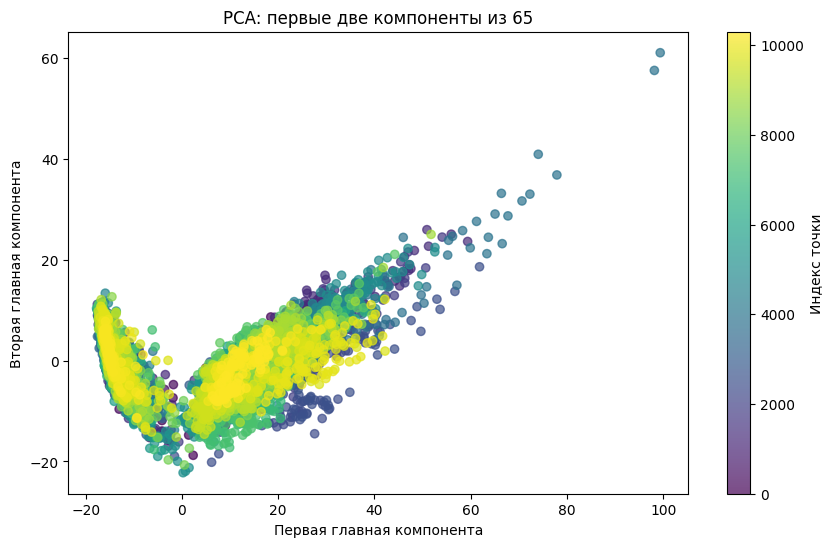

In [91]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(len(X_pca)), cmap="viridis", alpha=0.7)
plt.colorbar(label="Индекс точки")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.title(f"PCA: первые две компоненты из {num_components}")
plt.show()

### **Задание 19. (0.5 балла)**

Разберёмся с `KMeans`, [doc](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

- Сделайте кластеризацию данных методом `KMeans`, обучив модель на данных со сниженной за счет `PCA` размерностью. Нужно искать 6 кластеров (изначально у нас 6 классов). Засеките время обучения и время инференса.

**Параметры обучения:**

```n_clusters = 6``` (число уникальных меток целевого класса = 6)

```n_init = 100```

```random_state = RANDOM_STATE``` (для воспроизводимости результата, не забывайте указывать его и дальше!)

Время обучения: 11.970535516738892 секунд
Время инференса: 0.0038552284240722656 секунд


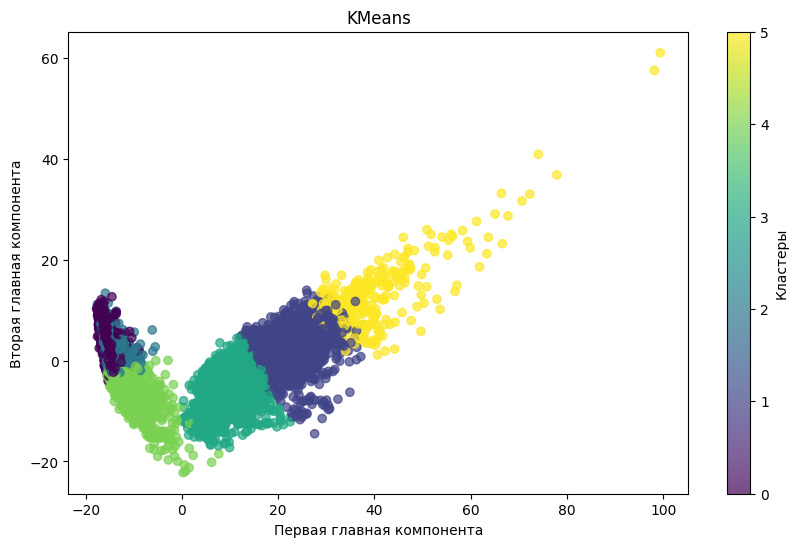

In [89]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)

start_train = time.time()
kmeans.fit(X_pca)
train_time = time.time() - start_train

start_pred = time.time()
clusters = kmeans.predict(X_pca)
pred_time = time.time() - start_pred

print(f"Время обучения: {train_time} секунд")
print(f"Время инференса: {pred_time} секунд")

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.colorbar(label="Кластеры")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.title("KMeans")
plt.show()

### **Задание 20 (0.2 балла)**

- Визуализируйте данные в проекции на первые две главные компоненты.
- Раскрасьте точки в соответствии с полученными метками кластеров.

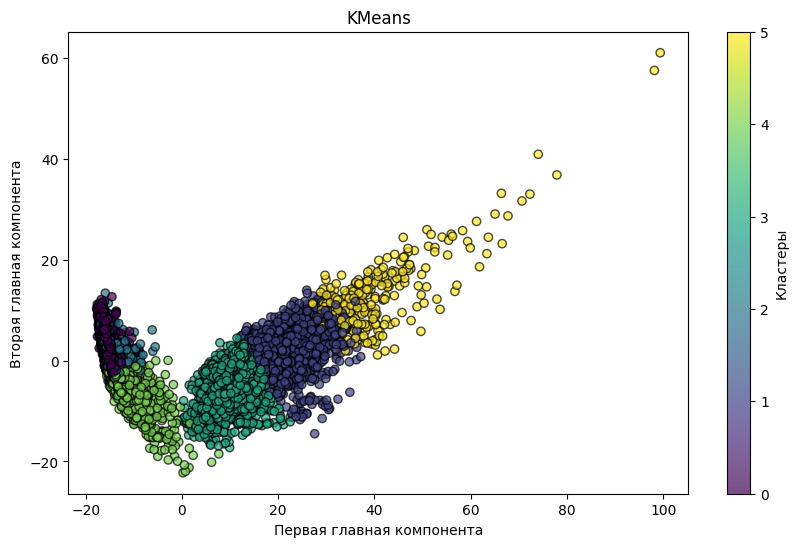

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7, edgecolors='k')
plt.colorbar(label="Кластеры")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.title("KMeans")
plt.show()

### **Задание 21 (0.3 балла)**

- Выберите какие-то метрики (минимум две) из известных вам. Объясните свой выбор
- Выведите на экран значения метрик качества, сделайте вывод о них и используйте их далее.

In [95]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_avg = silhouette_score(X_pca, clusters)
calinski_harabasz = calinski_harabasz_score(X_pca, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:}")

Silhouette Score: 0.14149759467581455
Calinski-Harabasz Index: 3287.362586994371


Silhouette Score: 0.14149759467581455

* Плохая кластеризация, данные сильно пересекаются

Calinski-Harabasz Index: 3287.362586994371

* Высокий индекс Calinski-Harabasz, кластеры хорошо различимы

### **Задание 22 (0.7 баллов)**

Теперь попробуем сделать кластеризацию с помощью `AgglomerativeClustering`, [doc](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

- Засеките время обучения и время инференса. После кластеризации также:
  - Вновь визуализируйте данные с раскраской по полученным меткам
  - Выведите метрики. Засеките время обучения и время инференса. Сравните с ```KMeans```.

Ответьте на следующие вопросы:
* Стало ли лучше?
* Почему?

In [96]:
from sklearn.cluster import AgglomerativeClustering

start_train = time.time()
agg_clustering = AgglomerativeClustering(n_clusters=6)
clusters_agg = agg_clustering.fit_predict(X_pca)

train_time_agg = time.time() - start_train
print(f"Время обучения: {train_time_agg} секунд")

Время обучения: 11.851689577102661 секунд


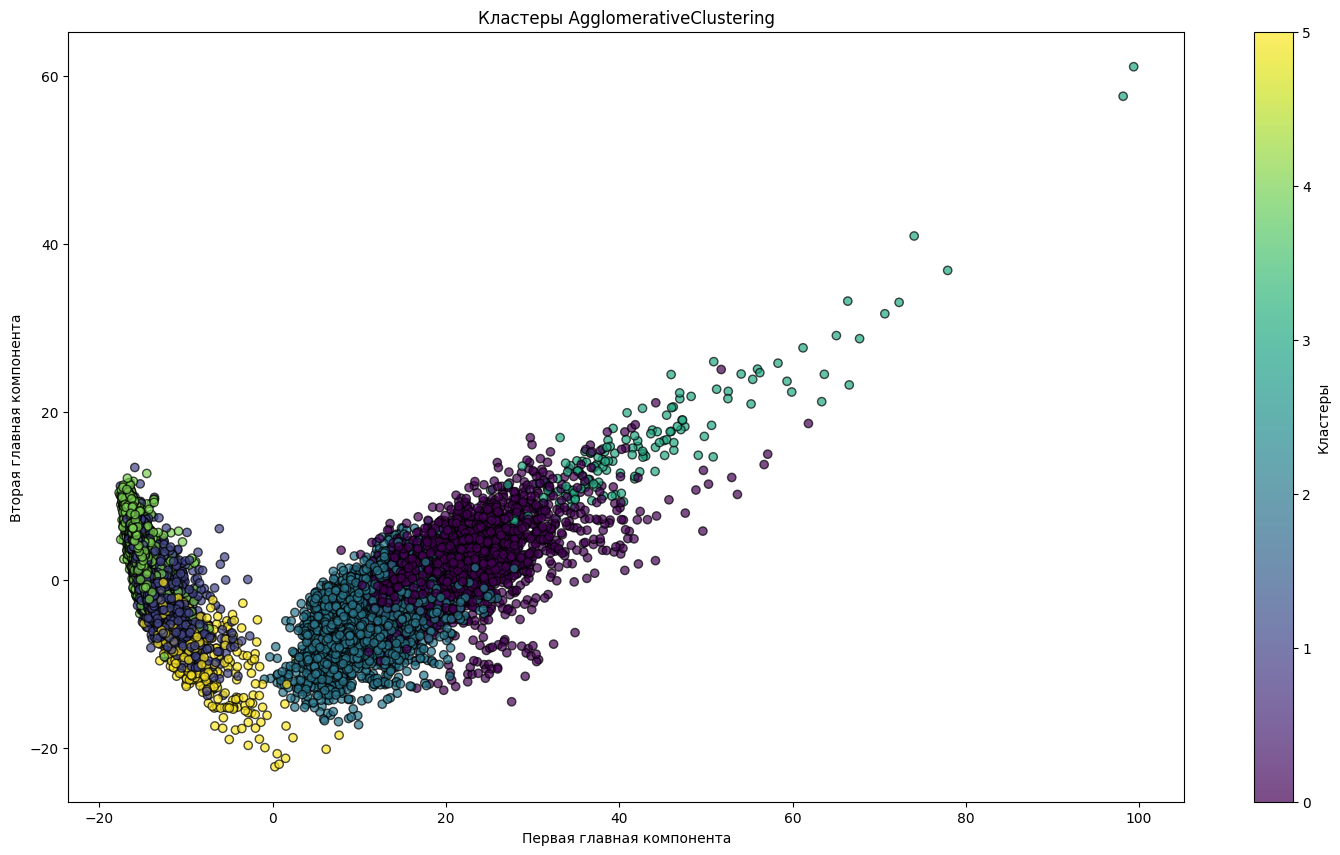

In [100]:
plt.figure(figsize=(18, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_agg, cmap="viridis", alpha=0.7, edgecolors='k')
plt.colorbar(label="Кластеры")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.title("Кластеры AgglomerativeClustering")
plt.show()

In [98]:
silhouette_avg_agg = silhouette_score(X_pca, clusters_agg)
calinski_harabasz_agg = calinski_harabasz_score(X_pca, clusters_agg)

print(f"Silhouette Score: {silhouette_avg_agg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_agg}")

Silhouette Score: 0.13658179879624427
Calinski-Harabasz Index: 3021.271974250814


Silhouette Score: 0.13658179879624427

Calinski-Harabasz Index: 3021.271974250814

Метрики всё такие же плохие, но показатели стали меньше

### **Задание 23 (0.3 балла)**
Для самой успешной из полученных кластеризаций попробуйте дать интерпретацию кластеров. Опишите характеристики объектов, попавших в каждый кластер. Для этого можете ответить на следующие вопросы:

* Похожи ли объекты внутри каждого кластера на определенный тип активности человека?
* В каких кластерах смешано несколько типов активности? С чем, на ваш взгляд, это может быть связано?
* Качественная ли получилась кластеризация? На основании чего вы можете сделать такой вывод?

1 - ходьба,

2 - подъем вверх по лестнице,

3 - спуск по лестнице,

4 - сидение,

5 - стояние,

6 - лежание

Судя по графику перемешиваются следующие кластеры:
* 2 и 5
* 2 и 6
* 1 и 3
* 1 и 4

Итого:
* подъем вверх по лестнице   И   стояние
* подъем вверх по лестнице   И   лежание
* ходьба    И    спуск по лестнице
* ходьба И сидение

В целом, показатели странные...

Из пересекающихся показателей только ходьба и спуск по лестнице похожи друг на друга

## **Бонус-задание (1 балл)**
![RedPanda](http://imgur.com/6Aa52Lm.png)

Алгоритмы кластеризации могут применяться в самых разных задачах. Например, в анализе изображений есть задача разделения изображения на семантические компоненты, которую можно решать в том числе с помощью алгоритмов кластеризации. В бонусе предлагаем вам попрактиковаться именно в этом на чудесной утке и совах (```duck.jpg``` и ```owls.jpg```)

### **(0.1 балл)**

- Откройте изображения, после чего визуализируйте их с помощью ```plt.imshow()```

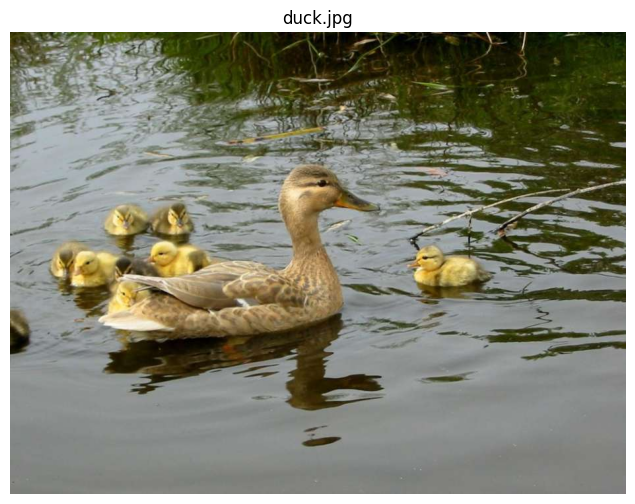

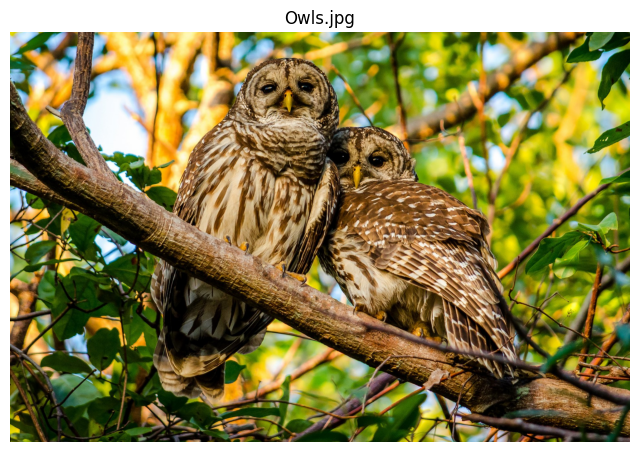

In [101]:
import matplotlib.pyplot as plt
from PIL import Image

duck_img = Image.open("duck.jpg")

plt.figure(figsize=(8, 6))
plt.imshow(duck_img)
plt.title("duck.jpg")
plt.axis("off")
plt.show()

owls_img = Image.open("Owls.jpg")

plt.figure(figsize=(8, 6))
plt.imshow(owls_img)
plt.title("Owls.jpg")
plt.axis("off")
plt.show()

### **(0.4 балла)**

Для каждого изображения, используя кластеризацию ```KMeans```, выделите компоненты, охарактеризовав каждый пиксель следующим образом: $$\psi_i = [\lambda x_i, \lambda y_i, r_i, g_i, b_i]$$
 где
- $x_i$ и $y_i$ — координаты пикселя,
- $r_i, g_i, b_i$ — его цвет,
- $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

Примените полученную функцию, взяв следующие $\lambda$: 0.3 и 1.5 для ```duck.jpg``` и ```owls.jpg``` (или другие, но тогда с вас красивые результаты :) )

**Примечание:**
Число кластеров подберите разумным образом на свой вкус (в качестве нулевого приближения можно взять 3)

### **(0.4 балла)**

Попробуйте выделить сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html).


**Примечание:**

Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету. При необходимости можно сжать изображения в 2 раза.

**Подсказка:**```skimage``` с его ```color``` и ```transform``` в этом помогут :)

Или же воспользуйтесь аналогичными средствами ```PIL``` или ```cv2```

In [ ]:
def spectral_segmentation(image, n_clusters, beta, eps):
    #your code here

### **(0.1 балл)**
Визуализируйте результаты сегментации (аналогично рисунку в начале задания 2) для обоих методов.

**Спасибо! Вы — человек — большой трудяга!**

Успокоительный котобонус :)

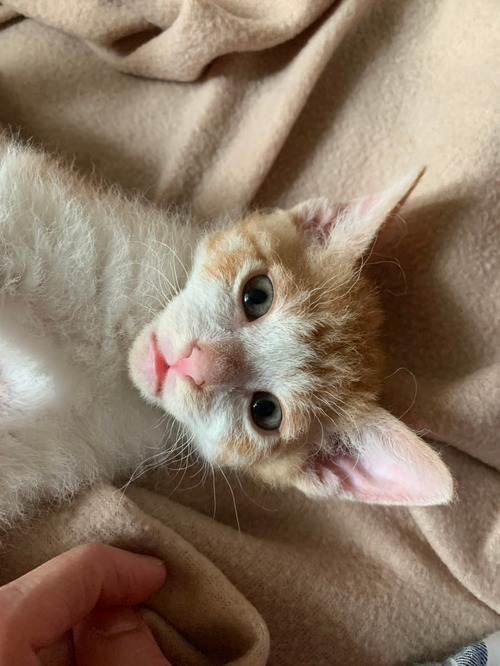